# Regression
* Regression analysis is an analysis method used to measure the relationship between two or more variables.
* If the analysis is done using a single variable, it is called univariate regression, if more than one variable is used, it is called multivariate regression.
* It is one of the supervised learning methods.(because it works by learning the data)

### Simple Linear Regression
* Simple linear regression is an approximation of a linear model used to describe the relationship between two variables.
* y = b0 +b1*X1

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [ ]:
# import data
df = pd.read_csv("linear_regression_dataset_20220209.csv", sep = ";")
# chanege the columns name.
df.head()

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


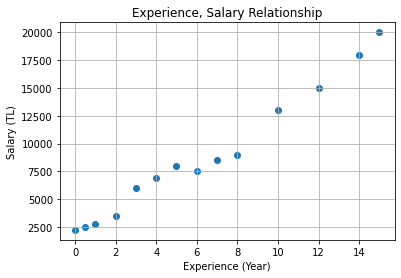

In [ ]:
# visualize the data
plt.scatter(df.experience, df.salary)
plt.xlabel("Experience (Year)")
plt.ylabel("Salary (TL)")
plt.title("Experience, Salary Relationship")
plt.grid(True)
plt.show()

* Linear Regression Model Training

In [ ]:
# Linear Regression Model
linear_reg = LinearRegression()

# Convert the experience and salary columns in the data to a numpy array.
x = df.experience.values.reshape(-1, 1)
y = df.salary.values.reshape(-1, 1)

# Linear Regression Training
linear_reg.fit(x,y)

LinearRegression()

In [ ]:
# Find the point where it intercepts the y-axis
y_joint_intersection = np.array([0]).reshape(1,-1)
b0 = linear_reg.predict(y_joint_intersection)
print("b0: ", b0)

#alternative way to find the point
# the point where it intersects the y-axis
b0_ =  linear_reg.intercept_
print("b0_: ", b0_)

# find slope
b1 = linear_reg.coef_
print("b1: ", b1)

b0:  [[1663.89519747]]
b0_:  [1663.89519747]
b1:  [[1138.34819698]]


In [ ]:
# salary = 1663 + 1138*experience
# Create a linear model based on the point where it cuts the y-axis and the slope.

experience = 15 # 15 years of experience
new_salary = 1663 + 1138*experience
print(new_salary)

#Estimate the salary of someone with 15 years of experience with the predict method.
result = linear_reg.predict(np.array([experience]).reshape(-1,1))
print("The salary of someone with 15 years of experience: {} TL".format(result[0]))

18733
The salary of someone with 15 years of experience: [18739.11815211] TL


### Multiple Linear Regression
* It is the approach of a model used to describe the relationship between more than two variables.
* y = b0 + b1*X1 + b2*X2+ ... + bn*Xn

In [ ]:
# import data
df = pd.read_csv("multiple_linear_regression_dataset_20220209.csv", sep = ";")
df.head()

,experience,salary,age
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [ ]:
x = df.iloc[:, [0,2]].values # Take experience and age as independent variables.
x

array([[ 0.5, 22. ],
       [ 0. , 21. ],
       [ 1. , 23. ],
       [ 5. , 25. ],
       [ 8. , 28. ],
       [ 4. , 23. ],
       [15. , 35. ],
       [ 7. , 29. ],
       [ 3. , 22. ],
       [ 2. , 23. ],
       [12. , 32. ],
       [10. , 30. ],
       [14. , 34. ],
       [ 6. , 27. ]])

In [ ]:
y = df.salary.values.reshape(-1,1) # Take the salary as the dependent variable.

* Multiple Regression Model Training

In [ ]:
#  Multiple Regression Model 
mutiple_linear_regression = LinearRegression()

# Linear Regression Training
mutiple_linear_regression.fit(x,y)

LinearRegression()

In [ ]:
# test 1
test_data1 = np.array([[8,32]])  # experience = 8 and age = 32
test_result1 = mutiple_linear_regression.predict(test_data1)
print("Salary after 8 years of experience and 32 years of age: {}" .format(test_result1[0]))

Salary after 8 years of experience and 32 years of age: [9245.52327646]


In [ ]:
# test 2
test_data2 = np.array([[12,40]])  # experience = 12 and age = 40
test_result2 = mutiple_linear_regression.predict(test_data2)
print("Salary after 10 years of experience and 35 years of age: {}" .format(test_result2[0]))

Salary after 10 years of experience and 35 years of age: [12013.74866857]


## Polynomial Regression
* It is the analysis method used when the relationship between the variables is not linear.
* y =  b0 + b1X1 + b2X22 + ……  + biXii

In [ ]:
# import required library
from sklearn.preprocessing import PolynomialFeatures # polynomial

In [ ]:
# import data
df = pd.read_csv("polynomial_regression_dataset_20220209.csv", sep = ";")
df.head()

,car_price,car_max_speed
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [ ]:
# sklearn usually accepts numpy as input.
y = df.car_max_speed.values.reshape(-1,1) # convert numpy array
x = df.car_price.values.reshape(-1,1) 

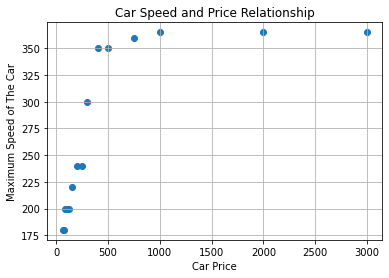

In [ ]:
# visualize data
plt.scatter(x,y)
plt.ylabel("Maximum Speed of The Car")
plt.xlabel("Car Price")
plt.title("Car Speed and Price Relationship")
plt.grid(True)
plt.show()

In [ ]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [ ]:
# %% Predict
y_predict = lr.predict(x)

In [ ]:
# polynomial regression

#polynomial properties
# polynomial_regression = PolynomialFeatures(degree = 3) # 3th order polynomial
polynomial_regression = PolynomialFeatures(degree = 4) # 4th order polynomial
# polynomial_regression = PolynomialFeatures(degree = 5) # 5th order polynomial

x_polynomial = polynomial_regression.fit_transform(x)
x_polynomial

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [ ]:
# %% with polynomial features to train polynomial regression.
lr2 = LinearRegression()
lr2.fit(x_polynomial, y)

LinearRegression()

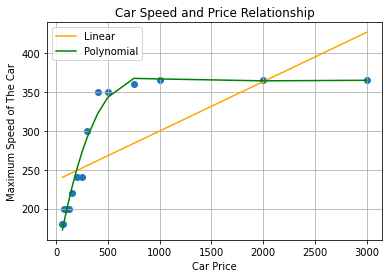

In [ ]:
# predict
y_predict2 = lr2.predict(x_polynomial)

plt.scatter(x,y)
plt.plot(x, y_predict, color = "orange", label = "Linear")
plt.plot(x, y_predict2, color = "green", label = "Polynomial")
plt.legend()
plt.ylabel("Maximum Speed of The Car")
plt.xlabel("Car Price")
plt.title("Car Speed and Price Relationship")
plt.grid(True)
plt.show()

## Evaluation of Regression Models
### What is R squared?
* R squared is the ratio of the dependent variables determined by the regression equation to the total variables.
* It is one of the most widely known evaluation criteria in regression.
### Evaluation of regression models with R squared.


In [ ]:
from sklearn.metrics import r2_score # r squared

In [ ]:
# import data
df = pd.read_csv("linear_regression_dataset_20220209.csv", sep = ";")
# chanege the columns name.
df.head()

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


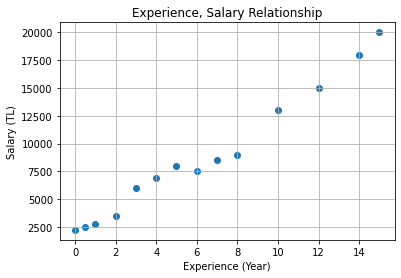

In [ ]:
# visualize the data
plt.scatter(df.experience , df.salary)
plt.xlabel("Experience (Year)")
plt.ylabel("Salary (TL)")
plt.title("Experience, Salary Relationship")
plt.grid(True)
plt.show()

In [ ]:
# Linear Regression Model
linear_reg = LinearRegression()

# Convert the experience and salary columns in the data to a numpy array.
x = df.experience.values.reshape(-1, 1)
y = df.salary.values.reshape(-1, 1)

# Linear Regression Training
linear_reg.fit(x,y)

LinearRegression()

In [ ]:
# polynomial regression

#polynomial properties
polynomial_regression = PolynomialFeatures(degree = 2) # 2th order polynomial

x_polynomial = polynomial_regression.fit_transform(x)
x_polynomial

# %% with polynomial features to train polynomial regression.
poly_reg = LinearRegression()
poly_reg.fit(x_polynomial, y)

LinearRegression()

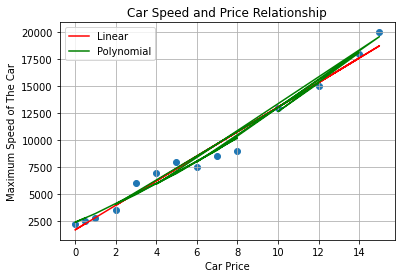

In [ ]:
# test
y_predict_linear = linear_reg.predict(x)
y_predict_poly = poly_reg.predict(x_polynomial)

plt.scatter(x,y)
plt.plot(x, y_predict_linear, color = "red", label = "Linear")
plt.plot(x, y_predict_poly, color = "green", label = "Polynomial")
plt.legend()
plt.ylabel("Maximum Speed of The Car")
plt.xlabel("Car Price")
plt.title("Car Speed and Price Relationship")
plt.grid(True)
plt.show()

In [ ]:
print("Linear Regression R squared: {}", r2_score(y, y_predict_linear))
print("Polynomial Regression R squared: {}", r2_score(y, y_predict_poly))

Linear Regression R squared: {} 0.9775283164949903
Polynomial Regression R squared: {} 0.9854449464578782


* As can be seen, the R squared result of the polynomial regression is closer to 1 than the R squared result of the linear regression.
* The higher the degree of the polynomial regression model, the closer R squared will be to 1.